# Interpolación de Lagrange

## Introducción

Recuerda en qué consiste el problema de interpolación polinómica: dados los valores de una función $f(x)$ en un conjunto de puntos $x_0, \dots x_n$ (nodos); es decir, los valores $y_i = f(x_i)$. La interpolación polinómica consiste en obtener un polinomio $p(x)$ que pase por los puntos $(x_i, y_i)$, es decir, que verifique $p(x_i) = y_i$. Siempre es posible construir un polinomio único de grado $n$ que pase por $n+1$ puntos distintos. El método de Lagrange permite obtener este polinomio de forma sistemática.


## Cálculo efectivo del polinomio de Lagrange

Si bien el problema puede plantearse como un sistema de ecuaciones estándar, se han desarrollado varios métodos particulares que dan lugar a procedimientos más eficientes y sistemáticos.

Dados los nodos de interpolación $\left\{ x_0, x_1, ... , x_n \right\}$ consideremos el conjunto de $n + 1$ polinomios $\left\{ l_0, l_1, ... , l_n \right\}$, que cumplen la siguiente relación:
$$
l_i\left(x_j\right)=\delta_{i j}=\left\{\begin{array}{ll}
1 & \text { para } i=j \\
0 & \text { para } j \neq i
\end{array} \quad(i, j=0, \ldots, n)\right.
$$
donde $\delta_{i j}$ es la delta de Kronecker. Estos polinomios se llaman **polinomios de Lagrange** y son fundamentales para la obtención del polinomio final. Observa el siguiente ejemplo para tres puntos $x_0=0$, $x_1=2$ y $x_2=3$:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=polinomios_de_lagrange.jpg&t=1uuFRqEWmZSYcpm&scalingup=0" width="350"/>
</div>
</center>


A continuación obtendremos la expresión matemática de estos polinomios a partir de los datos disponibles. La condición de que $l_i(x_j) = 0$ $(j \neq i)$ impone la siguiente relación:
$$
l_i(x)=C\left(x-x_0\right) \ldots\left(x-x_{i-1}\right)\left(x-x_{i+1}\right) \ldots\left(x-x_n\right),
$$
Y como $l_i(x_i) = 1$, el valor de la constante $C$ deberá ser:
$$
C=\left[\left(x_i-x_0\right) \ldots\left(x_i-x_{i-1}\right)\left(x_i-x_{i+1}\right) \ldots\left(x_i-x_n\right)\right]^{-1},
$$
Por tanto
$$
l_i(x)=\frac{\left(x-x_0\right) \cdots\left(x-x_{i-1}\right)\left(x-x_{i+1}\right) \cdots\left(x-x_n\right)}{\left(x_i-x_0\right) \cdots\left(x_i-x_{i-1}\right)\left(x_i-x_{i+1}\right) \cdots\left(x_i-x_n\right)}=\prod_{\substack{j=0 \\ j \neq i}}^n \frac{x-x_j}{x_i-x_j} .
$$


Ahora, la formula del polinomio final puede ser obtenida trivialmente haciendo:
$$
p_n(x)=f\left(x_0\right) l_0(x)+f\left(x_1\right) l_1(x)+\cdots+f\left(x_n\right) l_n(x)=\sum_{i=0}^n f\left(x_i\right) l_i(x)
$$

Por ejemplo, si $n=1$, el polinomio interpolante es una línea recta $p_1(x)=y_0 l_0(x)+$ $y_1 l_1(x)$, donde
$$
l_0(x)=\frac{x-x_1}{x_0-x_1} \quad l_1(x)=\frac{x-x_0}{x_1-x_0}
$$
Y si $n=2$, el polinomio interpolante será parabólico: $p_2(x)=y_0 l_0(x)+y_1 l_1(x)+y_2 l_2(x)$, con
$$
\begin{aligned}
& l_0(x)=\frac{\left(x-x_1\right)\left(x-x_2\right)}{\left(x_0-x_1\right)\left(x_0-x_2\right)} \\
& l_1(x)=\frac{\left(x-x_0\right)\left(x-x_2\right)}{\left(x_1-x_0\right)\left(x_1-x_2\right)} \\
& l_2(x)=\frac{\left(x-x_0\right)\left(x-x_1\right)}{\left(x_2-x_0\right)\left(x_2-x_1\right)}
\end{aligned}
$$


In [2]:
x= [0 , 2, 3]
y = [7, 11, 28]

In [3]:

def lagrange_base(x_data: list | tuple,
                  i: int,
                  x_val: float) -> float:
    
    lag = 1.0
    for j in range(len(x_data)):
        if j != i :
            lag *= (x_val - x_data[j]) / (x_data[i] - x_data[j])

    return lag


def eval_lagrange(x_data: list | tuple,
                  y_data: list | tuple,
                  x_val: float) -> float:
    
    p = 0.0

    for i in range(len(x_data)):
        p += y_data[i] * lagrange_base(x_data, i, x_val)

    return p


eval_lagrange(x, y, 0.67)

3.884499999999999

In [6]:
# Definimos los datos
x_data = [-1.0, 0.0, 1.0]
y_data = [0.5, 1.0, 0.5]

# Valor en el que queremos evaluar
x_val = 0.5

# Evaluamos la base de Lagrange para el índice i = 1
i = 1
lagrange_base_value = lagrange_base(x_data, i, x_val)

# Evaluamos el polinomio de Lagrange completo en x_val
polinomio_lagrange_value = eval_lagrange(x_data, y_data, x_val)

# Mostramos los resultados
print(f"El valor de la base de Lagrange L_1(x) en x = {x_val} es: {lagrange_base_value}")
print(f"El valor del polinomio interpolante de Lagrange en x = {x_val} es: {polinomio_lagrange_value}")


El valor de la base de Lagrange L_1(x) en x = 0.5 es: 0.75
El valor del polinomio interpolante de Lagrange en x = 0.5 es: 0.875


## Unicidad del polinomio interpolante

Para demostrar que solo existe un polinomio de grado $n$ que pasa por los $n+1$ valores $(x_i, y_i)$ dados, procederemos por reducción al absurdo.

Supongamos que existen dos polinomios interpolantes, $p_n(x)$ y $q_n(x)$, ambos de grado $n$. Entonces el polinomio:

$$
r(x) = p_n(x) - q_n(x)
$$
verifica que su grado es menor o igual que $n$, ya que la resta de dos polinomios de grado menor o igual que $n$ resulta en un polinomio también de grado menor o igual que $n$. También debe cumplir que se anula en $n+1$ nodos, ya que 

$$
p_n(x_i) = q_n(x_i) = y_i \implies r(x_i) = 0
$$


Cualquier polinomio no nulo de grado $n$ admite a lo sumo $n$ raíces, por lo que se concluye que $n$ debe ser el polinomio nulo y, por tanto $q_n \equiv p_n$

Este resultado es importante: a continuación se verá otro método para obtener el polinomio interpolante, que puede resultar en una expresión aparentemente distinta. Sin embargo, de este apartado se deduce que dicho polinomio es único y que reordenando términos debe llegarse a la misma expresión.

## Observaciones sobre el polinomio interpolante

- Si $f(x)$ es una función polinómica de grado menor o igual que n, entonces la propiedad de unicidad asegura que $f(x) \equiv p_n(x)$, siendo $p_n$ el polinomio interpolante de $f$ en cualquier conjunto de $n+ 1$ nodos.
- Puede ocurrir que el polinomio interpolante sea de grado estrictamente menor que $n$.
- Si se consideran polinomios de grado mayor que $n$ entonces existen infinitos polinomios interpolantes.

## Error del polinomio interpolante

Se puede demostrar que el error del polinomio interpolante es:
$$
f(x)-p_n(x)=\frac{\left(x-x_0\right)\left(x-x_1\right) \cdots\left(x-x_n\right)}{(n+1) !} f^{(n+1)}(\xi)
$$
donde $\xi$ cae en algún lugar del intervalo $(x_0, x_n)$ (desconocido).

## Método de Newton

Aunque el método de Lagrange es conceptualmente simple, resulta en un algoritmo muy ineficiente, ya que para construir los polinomios de Lagrange se requieren muchas operaciones. Se puede obtiene un procedimiento computacional más eficiente con el método de Newton, donde el polinomio interpolante se escribe en la forma:
$$
p_n(x)=a_0+\left(x-x_0\right) a_1+\left(x-x_0\right)\left(x-x_1\right) a_2+\cdots+\left(x-x_0\right)\left(x-x_1\right) \cdots\left(x-x_{n-1}\right) a_n
$$

Este polinomio tiene un procedimiento eficiente de evaluación. Consideremos, por ejemplo un caso con cuatro puntos $(n=3)$. Aquí, el polinomio interpolante es
$$
\begin{aligned}
p_3(x) & =a_0+\left(x-x_0\right) a_1+\left(x-x_0\right)\left(x-x_1\right) a_2+\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right) a_3 \\
& =a_0+\left(x-x_0\right)\left\{a_1+\left(x-x_1\right)\left[a_2+\left(x-x_2\right) a_3\right]\right\}
\end{aligned}
$$
que puede ser evaluado *hacia atrás* por la expresión:
$$
\begin{aligned}
& p_0(x)=a_3 \\
& p_1(x)=a_2+\left(x-x_2\right) p_0(x) \\
& p_2(x)=a_1+\left(x-x_1\right) p_1(x) \\
& p_3(x)=a_0+\left(x-x_0\right) p_2(x)
\end{aligned}
$$
Y para un $n$ arbitrario:
$$
p_0(x)=a_n \quad p_k(x)=a_{n-k}+\left(x-x_{n-k}\right) p_{k-1}(x), \quad k=1,2, \ldots, n
$$



Llamando al conjunto de valores $x$ de datos de entrada ```x_data``` y al grado del polinomio ```n```, podemos plantear el siguiente algoritmo para calcular $p_n(x)$:
```
p = a[n]
for k in range(1,n+1):
    p = a[n-k] + (x - x_data[n-k]) * p
```

Los coeficientes de $p_n$ se determinan obligando al polinomio a pasar por cada punto de los datos de entrada: $y_i = p_n\left(x_i\right), \quad i=0,1, \ldots, n$. Esto da lugar al siguiente sistema de ecuaciones:
$$
\begin{aligned}
y_0= & a_0 \\
y_1= & a_0+\left(x_1-x_0\right) a_1 \\
y_2= & a_0+\left(x_2-x_0\right) a_1+\left(x_2-x_0\right)\left(x_2-x_1\right) a_2 \\
& \vdots \\
y_n= & a_0+\left(x_n-x_0\right) a_1+\cdots+\left(x_n-x_0\right)\left(x_n-x_1\right) \cdots\left(x_n-x_{n-1}\right) a_n
\end{aligned}
$$
La resolución de este sistema se suele organizar de la siguiente forma. Primero, introducimos el concepto de **diferencias divididas**.

### Diferencias divididas
Se llama diferencia dividida de orden $n$ de la función $f$ en los puntos $x_0, x_1, \ldots, x_n$ al coeficiente del término $x^n$ en el polinomio interpolante $p_n(x)$ de $f$ en $x_0, x_1, \ldots, x_n$. Se representa por $f\left[x_0, \ldots, x_n\right]$.
La diferencia dividida depende solamente de los valores de $f$ en los puntos $x_0, \ldots, x_n$ y es independiente del orden en que se escriban sus argumentos (es decir, de la ordenación de los puntos $x_i$ al construir $p_n(x)$). Así, por ejemplo, $f\left[x_0, x_1, \ldots, x_{n-1}, x_n\right] = f\left[x_n, x_{n-1}, \ldots, x_1, x_0 \right]$.
El coeficiente $a_n$ en la fórmula de Newton es el coeficiente de $x^n$ en $p_n(x)$, por tanto
$$
a_n \equiv f\left[x_0, \ldots, x_n\right],
$$
y cada uno de los coeficientes que aparecen en la fórmula de Newton son diferencias dividas de cierto orden. La fórmula de Newton para el polinomio interpolante puede escribirse en la siguiente forma usando el concepto de diferencias divididas:
$$
p_n(x) = f\left[x_0\right] + \sum_{i=1}^n f\left[x_0, \ldots, x_i\right] \prod_{j=0}^{i-1}\left(x-x_j\right)
$$

### Tabla de diferencias divididas - calculo efectivo
Para calcular las diferencias divididas $a_0, a_1, \ldots, a_n$ podemos imponer las condiciones $p_n\left(x_i\right)=f\left(x_i\right)$, $(i=0, \ldots, n)$, lo que da lugar a un sistema de ecuaciones cuya matriz de coeficientes es triangular inferior que puede resolverse fácilmente. Por ejemplo, las diferencias divididas $a_0, a_1$ y $a_2$ se obtienen particularizando $p_n(x)$ en $x_0, x_1$ y $x_2$:
$$
\begin{aligned}
& a_0 \equiv f\left[x_0\right]=f\left(x_0\right) \\
& a_1 \equiv f\left[x_0, x_1\right]=\frac{f\left(x_1\right)-f\left(x_0\right)}{x_1-x_0} \equiv \frac{f\left[x_1\right]-f\left[x_0\right]}{x_1-x_0} \\
& a_2 \equiv f\left[x_0, x_1, x_2\right]=\frac{\frac{f\left(x_2\right)-f\left(x_1\right)}{x_2-x_1}-\frac{f\left(x_1\right)-f\left(x_0\right)}{x_1-x_0}}{x_2-x_0} \equiv \frac{f\left[x_1, x_2\right]-f\left[x_0, x_1\right]}{x_2-x_0} .
\end{aligned}
$$
Sin embargo, es más conveniente obtener estos coeficientes recurriendo a que las diferencias divididas de orden $k$ pueden obtenerse a partir de las de orden $k-1$ según la siguiente ley de construcción:
$$
a_k \equiv f\left[x_0, \ldots, x_k\right]=\frac{f\left[x_1, \ldots, x_k\right]-f\left[x_0, \ldots, x_{k-1}\right]}{x_k-x_0}
$$
La expresión anterior (que justifica el nombre de diferencia dividida) permite generar todas diferencias divididas de una manera sencilla con la ayuda de la llamada *tabla de diferencias divididas*. Por ejemplo, para $n = 4$:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=tabla_diferencias_divididas.jpg&t=gv19YkIY0NcQIWI&scalingup=0" width="700"/>
</div>
</center>

Esta herramienta es especialmente útil si se desea calcular el polinomio interpolante operando *a mano*.

A partir de la columna con las diferencias divididas de orden cero (que son los valores de la función) pueden calcularse sucesivamente las restantes columnas. Una vez calculada la tabla, **los primeros elementos de cada columna son los coeficientes de la fórmula de Newton**. Observa que dichos coeficientes dependen de la ordenación de los nodos que figura en la primera columna de la tabla.

Todos los elementos de la tabla son diferencias divididas y, por tanto, son coeficientes de un cierto polinomio interpolante. De manera que es posible obtener el polinomio interpolante correspondiente otro subconjunto de nodos, o a otra base de polinomios, eligiendo combinaciones adecuadas de elementos de la tabla (uno de cada columna). Así, por ejemplo, $f\left[x_3\right], f\left[x_3, x_4\right]$ y $f\left[x_2, x_3, x_4\right]\left(=f\left[x_3, x_4, x_2\right]\right)$ determinan el polinomio $p_2$ que interpola $f$ en los nodos $\left\{x_2, x_3, x_4\right\}$ expresado en la base de polinomios $\left\{1, x-x_3,\left(x-x_3\right)\left(x-2 \right)\right\}$:
$$
p_2=f\left[x_3\right]+f\left[x_3, x_4\right]\left(x-x_3\right)+f\left[x_2, x_3, x_4\right]\left(x-x_3\right)\left(x-x_4\right)
$$
Pero este mismo polinomio $p_2$ también puede expresarse como
$$
p_2=f\left[x_2\right]+f\left[x_2, x_3\right]\left(x-x_2\right)+f\left[x_2, x_3, x_4\right]\left(x-x_2\right)\left(x-x_3\right)
$$
$$
p_2=f\left[x_4\right]+f\left[x_3, x_4\right]\left(x-x_4\right)+f\left[x_2, x_3, x_4\right]\left(x-x_4\right)\left(x-x_3\right)
$$
Obsérvese que, de acuerdo con la definición de diferencia dividida, $f\left[x_2, x_3, x_4\right]$ representa el coeficiente de $x^2$ en el polinomio interpolante en los nodos $\left\{x_2, x_3, x_4\right\}$, con independencia de la base que se utilice.
En general las diferencias divididas de orden $j$ se definen a partir de las diferencias de orden $j-1$ mediante la siguiente ley de recurrencia
$$
f\left[x_i, x_{i+1}, \ldots, x_{i+j-1}, x_{i+j}\right]=\frac{f\left[x_{i+1}, \ldots, x_{i+j}\right]-f\left[x_i, \ldots, x_{i+j-1}\right]}{x_{i+j}-x_i}
$$

**Ejercicio 1 -** Los cálculos computacionales para obtener las diferencias divididas necesarias para el cálculo del polinomio interpolante por el método de Newton pueden realizarse manejando una único *array* unidimensional ```coefficients``` inicializado con los valores $y_i$. La idea es que al final del proceso ```coefficients``` contenga los términos diagonales de la tabla de diferencias divididas; es decir, los coeficientes del polinomio interpolante. 

Implementa un método ```compute_newton_coefficients(x_data, y_data)``` que calcule los coeficientes del polinomio interpolante siguiendo el método anterior, a partir de los datos ```x_data, y_data```. Implementa también un método que evalúe dicho polinomio, ```evaluate_newton_polynomial(coefficients, x_data, x)``` en una cierta $x$.

In [1]:
def coeficientes_p_newton(x_data: list | tuple,
                          y_data: list | tuple) -> list:

    x_iniciales = x_data
    y_iniciales = y_data
    capa_actual = 0
    coeficientes = []
    dif_divididas = []
    coeficientes.append(y_iniciales[0])
    
    while len(y_iniciales) > 1:
        #i = 0
        for i in range(len(y_iniciales) - 1):

            valor = (y_iniciales[i+1] - y_iniciales[i]) / (x_iniciales[i+capa_actual+1] - x_iniciales[i])

            dif_divididas.append(valor)

            if i == 0:
                coeficientes.append(valor)

            i += 1
        
        capa_actual += 1
        y_iniciales = dif_divididas
        dif_divididas = []
    
    return coeficientes


x = [-2, 1, 4, -1, 3, -4]
y = [-1, 2, 59, 4, 24, -53]

coeficientes_p_newton(x, y)

[-1, 1.0, 3.0, 1.0, 0.0, 0.0]

In [24]:
#primer intento
def evaluate_newton_polynomial(coefficients: list,
                               x_data: list,
                               x: float):
    p_n = coefficients[0]
    
    for i in range(1, len(coefficients)):
        producto = 1
        for j in range(0, i):
            producto *= (x - x_data[j])
        
        valor = coefficients[i] * producto
    p_n +=  valor
    return p_n

x = [-2, 1, 4, -1, 3, -4]
y = [-1, 2, 59, 4, 24, -53]
evaluate_newton_polynomial(coeficientes_p_newton(x, y), x, 3)

-1.0

In [2]:
#optimizacion
def evaluate_newton_polynomial(coefficients: list,
                               x_data: list,
                               x: float):
    p_n = coefficients[0]
    producto_acumulado = 1
    for i in range(1, len(coefficients)):
        producto_acumulado *= (x - x_data[i - 1])
    
        valor = coefficients[i] * producto_acumulado
        p_n +=  valor
    return p_n

x = [-2, 1, 4, -1, 3, -4]
y = [-1, 2, 59, 4, 24, -53]
evaluate_newton_polynomial(coeficientes_p_newton(x, y), x, 3)

24.0

## Convergencia del polinomio interpolante

La interpolación polinómica debe realizarse con el menor número posible de puntos. La interpolación lineal, utilizando los dos puntos más cercanos, suele ser suficiente si los puntos están muy próximos. En la mayoría de los casos, de tres a seis puntos cercanos producen buenos resultados. Un interpolante que utilice más de seis puntos debe tomarse con precaución. La razón es que los puntos que están lejos del punto de interés no contribuyen a la precisión de la interpolación. De hecho, pueden ser perjudiciales.

Para muchas funciones el error de interpolación $e_n(x)=f(x)-p_n(x)$ tiende a cero cuando $n \rightarrow \infty$. Así, por ejemplo, para $f(x)=e^x$ en el intervalo $[0,1]$, el error de interpolación con $n+1$ nodos verifica $\lim_{n \to \infty} e_n(x)=0$.

Sin embargo existen funciones para las cuales el error crece cuando $n$ crece, es decir, la sucesión $\left\{p_n(x)\right\}$ no converge a $f(x)$. Considérese, por ejemplo, $f(x)=1 /\left(1+x^2\right)$ en $[-5,5]\left(f\right.$ es $\left.\mathcal{C}^{\infty}\right)$. Si es $p_n(x)$ el polinomio interpolante de $f$ en $n+1$ puntos equiespaciados del intervalo $[-5,5]$ puede demostrarse que cuando $n \rightarrow \infty$, $p_n(x)$ no converge a $f(x)$ en los extremos del dominio. En la siguiente figura se observa que el polinomio de grado 10 basado en 11 nodos equiespaciados es una aproximación muy mala en los extremos del intervalo. Si el número de nodos se incrementase, entonces las "oscilaciones" serían más grandes todavía. 

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=fenomeno_runge.jpg&t=7ktZQaZWTD0QMWV&scalingup=0" width="400"/>
</div>
</center>

Este problema se resuelve normalmente 1) utilizando nodos no equiespaciados, 2) usando otra técnica de interpolación (e.g. interpolación a trozos).

**Ejemplo 2 -** Considera la función $f(x)=1 /\left(1+25x^2\right)$ en el intervalo $[-1,1]$.
 1. Implementa una función que calcule el polinomio interpolante de grado $n$ (argumento de la función) con nodos equiespaciados. Utiliza las funciones disponibles del ejemplo 1.
 2. Calcula y grafica el error máximo de la aproximación en función de $n$.
 3. Experimenta con nodos no equiespaciados y comprueba si el problema identificado anteriormente se puede resolver.


In [ ]:
def lagrange_base(x_data: list | tuple,
                  i: int,
                  x_val: float) -> float:
    
    lag = 1.0
    for j in range(len(x_data)):
        if j != i :
            lag *= (x_val - x_data[j]) / (x_data[i] - x_data[j])

    return lag


def eval_lagrange(x_data: list | tuple,
                  y_data: list | tuple,
                  x_val: float) -> float:
    
    p = 0.0

    for i in range(len(x_data)):
        p += y_data[i] * lagrange_base(x_data, i, x_val)

    return p


eval_lagrange(x, y, -0.5)

np.float64(0.09950819137736827)

In [16]:
def func(x: float) -> float:
    return 1/(1 + 25 * x**2)

In [32]:
import numpy as np 
kk= -0.333333333333333
x = np.linspace(-1, 1, 10)
y = [float(func(a)) for a in x]
print(x)
print(y)
pito_real = func(kk)
pito_aprox = eval_lagrange(x, y, kk)
print(pito_aprox)
print(pito_real)

error = abs(pito_real - pito_aprox)

print('error' , error)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[0.038461538461538464, 0.06202143950995406, 0.11473087818696882, 0.2647058823529412, 0.7641509433962262, 0.7641509433962262, 0.26470588235294124, 0.11473087818696891, 0.06202143950995408, 0.038461538461538464]
0.26470588235294196
0.26470588235294157
error 3.885780586188048e-16


In [ ]:
def ejercicio(min_intervalo: float, max_intervalo: float, n: int, x_val) -> float:
    #n es el nuemro de puntos
    x_data = np.linspace(min_intervalo, max_intervalo, n)
    y_data = [func(a) for a in x_data]
    
    print(x_data)
    print(y_data)
    
    
    return float(eval_lagrange(x_data, y_data, x_val))

ejercicio(-1, 1, 10, 0.0)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[np.float64(0.038461538461538464), np.float64(0.06202143950995406), np.float64(0.11473087818696882), np.float64(0.2647058823529412), np.float64(0.7641509433962262), np.float64(0.7641509433962262), np.float64(0.26470588235294124), np.float64(0.11473087818696891), np.float64(0.06202143950995408), np.float64(0.038461538461538464)]


0.8615381519658186

In [10]:
#2
def max_error(min_intervalo, max_intervalo, n) -> float:
    eje_x = np.linspace(min_intervalo, max_intervalo, n)
    y_real = [float(func(a)) for a in eje_x]
    y_aprox = [ejercicio(min_intervalo, max_intervalo, n, b) for b in eje_x]
    
    for i in range(len(eje_x)):
        error_max = [abs(y_real[i] - y_aprox[i]) for i in range(len(eje_x))]
        

    return max(error_max)

max_error(-1, 1, 100)


0.0

In [22]:
#2
x_real = np.linspace(-1, 1, 100)
y_real = [float(func(a)) for a in x_real]
n = 100
minimo = -1
maximo = 1
x_aprox = np.linspace(minimo, maximo, n)
y_aprox = [ejercicio(minimo, maximo, n, b) for b in x_aprox]
print(y_aprox)
#print(len(y_aprox))

NameError: name 'ejercicio' is not defined

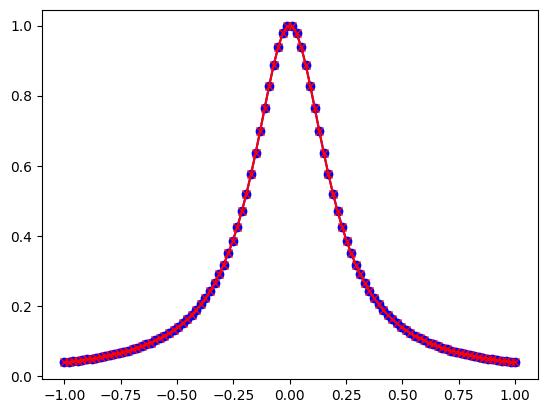

In [12]:
import matplotlib.pyplot as plt # type: ignore

plt.plot(x_real, y_real, label='Datos reales', marker='o', color='b')
plt.plot(x_aprox, y_aprox, label='Datos aproximados', marker='x', color='r')

plt.show()


In [48]:
#3
x_no_equispaciada = sorted(np.random.uniform(minimo, maximo, 100))
#y_no_equispaciada = [ejercicio(minimo, maximo, n, b) for b in sorted(x_no_equispaciada)]
y_no_equispaciada = [func(b) for b in sorted(x_no_equispaciada)]
#print(x_no_equispaciada)
#print(y_no_equispaciada)

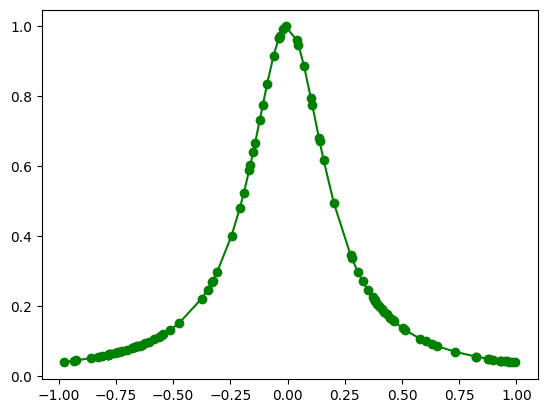

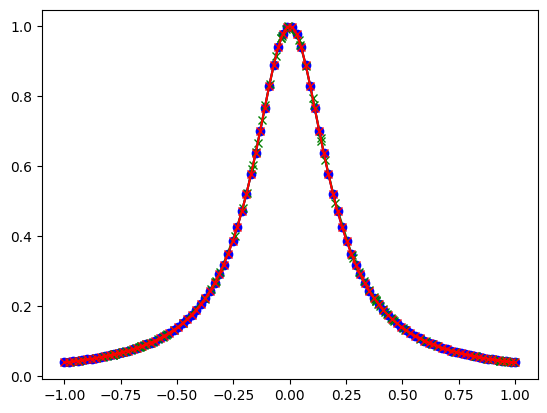

In [60]:
plt.plot(x_no_equispaciada, y_no_equispaciada, label='Datos aproximados',marker='o', color='g')
plt.show()
plt.plot(x_real, y_real, label='Datos reales', marker='o', color='b')
plt.plot(x_no_equispaciada, y_no_equispaciada, label='Datos aproximados',marker='x', color='g')
plt.plot(x_aprox, y_aprox, label='Datos aproximados', marker='x', color='r')

plt.show()

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

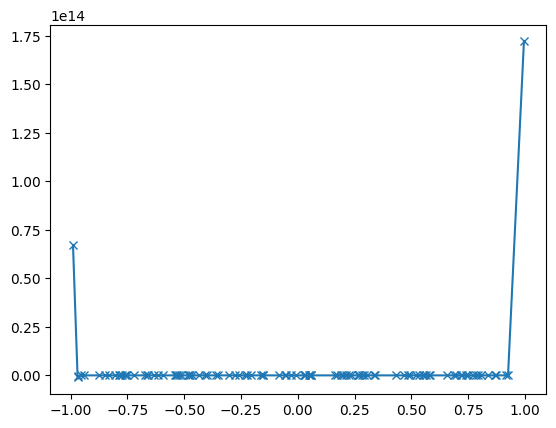

In [56]:
x_mamahuevo = sorted(np.random.uniform(minimo, maximo, 100))
y_mamahuevo = [ejercicio(minimo, maximo, n, b) for b in sorted(x_mamahuevo)]

plt.plot(x_mamahuevo, y_mamahuevo, marker = 'x')
plt.show()

In [51]:
print(x_mamahuevo)

[np.float64(-0.9974485463997462), np.float64(-0.9933829306984552), np.float64(-0.965819240888129), np.float64(-0.958042931775335), np.float64(-0.9513495162017753), np.float64(-0.9384368664190477), np.float64(-0.9225856518557303), np.float64(-0.9175982563230773), np.float64(-0.8914034471771615), np.float64(-0.8569913432353058), np.float64(-0.8391607927655924), np.float64(-0.8070431626979047), np.float64(-0.8063920512127354), np.float64(-0.7995495144838214), np.float64(-0.7972789676403975), np.float64(-0.7711439247815568), np.float64(-0.7454025660959078), np.float64(-0.6435919368552177), np.float64(-0.6191499397523086), np.float64(-0.6187018670099909), np.float64(-0.5788088998893), np.float64(-0.5061992508261992), np.float64(-0.5039805426728798), np.float64(-0.3735022341077159), np.float64(-0.32634753095044355), np.float64(-0.2624967781047256), np.float64(-0.2574315456503522), np.float64(-0.24261069421048576), np.float64(-0.2285271922515697), np.float64(-0.21413677048714064), np.float64(

In [52]:
print(y_mamahuevo)

[173631521317413.5, 146168041683756.12, -485688930160.0616, 34421775839.60156, 42927159352.903656, -775852122.8033434, -222526640.1774317, 51402494.151439615, -4769184.200998162, -15437.98814969465, -917.3967673259519, -214.08073147013826, -195.59451528295074, -23.790769529091495, 8.535233137019423, -4.818498172586227, 0.5463404561958165, 0.0879457196226278, 0.09449599498025901, 0.09461813608838737, 0.10666186370463146, 0.13502674124026984, 0.13605612007531978, 0.22283636061043577, 0.2730324902211693, 0.3672940834234091, 0.3763961921726173, 0.40461279240406794, 0.4337233920656005, 0.4659042180464432, 0.5684262209441696, 0.6676992662247457, 0.6723306529070395, 0.6769030386616159, 0.682279941988851, 0.7077087792293323, 0.7289696114123372, 0.7597937172566941, 0.8151730434051334, 0.8410788853869967, 0.8568431212046254, 0.9556558625347527, 0.9675770351273635, 0.9886589951654156, 0.996249746993056, 0.997748688128254, 0.9978324991343244, 0.9794770854417973, 0.8669494510658404, 0.8166959572514